## 1. Merge file for final analysis & calculate API for each school

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

# Set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
# Import test score data
test = pd.read_csv('data/11_test_merged.csv', index_col=False)
test.head(10)

,schoolcode,schoolname,districtcode,districtname,zip,schooltype,student_tested1,student_tested2,testscore1,testscore2,test_API1,test_API2
0,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,middle,296.00,293.00,"2,443.20","2,406.50",3.00,2.67
1,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,high,62.00,62.00,"2,526.30","2,491.20",4.00,3.00
2,109660,Aspire Antonio Maria Lugo Academy,10199,Aspire Antonio Maria Lugo Academy,90255,elementary,214.00,214.00,"2,486.40","2,522.00",5.67,6.33
3,109942,Los Angeles International Charter High,10199,Los Angeles International Charter High,90042,high,37.00,35.00,"2,562.70","2,534.90",5.00,3.00
4,112128,Aspire Ollin University Preparatory Academy,10199,Aspire Ollin University Preparatory Acad,90255,middle,195.00,195.00,"2,547.10","2,530.30",4.67,4.00
5,112128,Aspire Ollin University Preparatory Academy,10199,Aspire Ollin University Preparatory Acad,90255,high,84.00,84.00,"2,589.90","2,570.20",6.00,4.00
6,115030,Magnolia Science Academy 3,10199,Magnolia Science Academy 3,90746,middle,277.00,277.00,"2,527.50","2,489.10",4.33,3.33
7,115030,Magnolia Science Academy 3,10199,Magnolia Science Academy 3,90746,high,51.00,51.00,"2,584.20","2,550.40",6.00,4.00
8,115212,Magnolia Science Academy 2,10199,Magnolia Science Academy 2,91406,middle,250.00,250.00,"2,563.90","2,558.90",5.00,4.33
9,115212,Magnolia Science Academy 2,10199,Magnolia Science Academy 2,91406,high,37.00,37.00,"2,618.20","2,539.00",7.00,3.00


In [3]:
# Import graduation rate, going to college rate merged data
grad_coll = pd.read_csv('data/12_grad_coll.csv', index_col=False)
print(grad_coll.shape)
grad_coll = grad_coll.drop(['zip', 'districtcode','districtname','schoolname'], axis=1)
grad_coll.head()

(518, 11)


,schoolcode,cohortstudents,graduates_count,graduates_rate,college_going_rate,completers,enrolled_in_college
0,100776,69,65,94.20,nan,nan,nan
1,109942,37,25,67.60,nan,nan,nan
2,112128,78,74,94.90,nan,nan,nan
3,115030,55,53,96.40,nan,nan,nan
4,115212,40,38,95.00,nan,nan,nan


In [4]:
# Merge graduation rate & college going rate to test score
df = test.merge(grad_coll, on='schoolcode', how='left')
df.head()

,schoolcode,schoolname,districtcode,districtname,zip,schooltype,student_tested1,student_tested2,testscore1,testscore2,test_API1,test_API2,cohortstudents,graduates_count,graduates_rate,college_going_rate,completers,enrolled_in_college
0,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,middle,296.00,293.00,"2,443.20","2,406.50",3.00,2.67,69.00,65.00,94.20,nan,nan,nan
1,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,high,62.00,62.00,"2,526.30","2,491.20",4.00,3.00,69.00,65.00,94.20,nan,nan,nan
2,109660,Aspire Antonio Maria Lugo Academy,10199,Aspire Antonio Maria Lugo Academy,90255,elementary,214.00,214.00,"2,486.40","2,522.00",5.67,6.33,nan,nan,nan,nan,nan,nan
3,109942,Los Angeles International Charter High,10199,Los Angeles International Charter High,90042,high,37.00,35.00,"2,562.70","2,534.90",5.00,3.00,37.00,25.00,67.60,nan,nan,nan
4,112128,Aspire Ollin University Preparatory Academy,10199,Aspire Ollin University Preparatory Acad,90255,middle,195.00,195.00,"2,547.10","2,530.30",4.67,4.00,78.00,74.00,94.90,nan,nan,nan


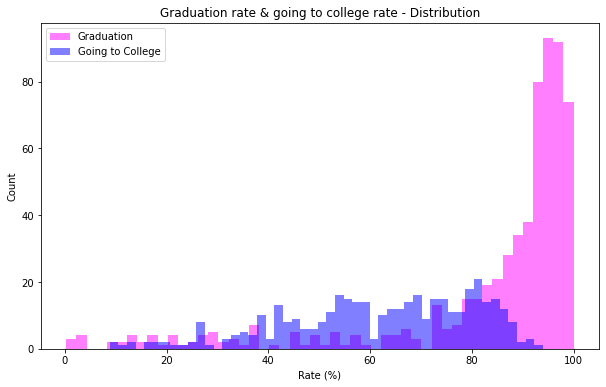

In [5]:
# Check graduationg rate distribution
#print(df.college_going_rate.describe())
fig, ax = plt.subplots(1,1, figsize=(10,7))
df.graduates_rate.plot(kind='hist', bins=50, figsize=(10,6), color='magenta', alpha=0.5)
df.college_going_rate.plot(kind='hist', bins=50, figsize=(10,6), color='blue',alpha=0.5)
ax.legend(labels=['Graduation','Going to College'])
ax.set_title('Graduation rate & going to college rate - Distribution')
ax.set_xlabel('Rate (%)')
ax.set_ylabel('Count')
pass

In [6]:
df.graduates_rate.describe()

count   626.00
mean     84.04
std      21.66
min       0.30
25%      83.35
50%      93.00
75%      96.20
max     100.00
Name: graduates_rate, dtype: float64

In [7]:
df.college_going_rate.describe()

count   395.00
mean     62.19
std      18.36
min       8.80
25%      50.60
50%      64.90
75%      77.65
max      94.00
Name: college_going_rate, dtype: float64

In [8]:
## Assign graduation rate & going to college API
# calculate API for the graduate rate
bins = [0, 40, 70, 83, 93, 94, 95, 96, 98, 99, 100]
labels = list(range(1,11))
df['grad_API'] = pd.cut(df.graduates_rate, bins=bins, labels=labels)
print(df.grad_API.value_counts())

# calculate API for the college going rate
bins = [0, 20, 35, 50, 60, 70, 75, 80, 85, 90, 100]
df['coll_API'] = pd.cut(df.college_going_rate, bins=bins, labels=labels)

df = df.astype({'grad_API':'float', 'coll_API':'float'})
df.grad_API.fillna(0, inplace=True)
df.coll_API.fillna(0, inplace=True)
print(df.coll_API.value_counts())

4     168
8      92
3      60
7      51
1      51
5      48
6      42
9      40
2      40
10     34
Name: grad_API, dtype: int64
0.00     3110
4.00       76
5.00       66
3.00       65
8.00       51
6.00       39
7.00       35
9.00       27
2.00       22
1.00       10
10.00       4
Name: coll_API, dtype: int64


In [9]:
## API for standard test score 
# get average test score of math & english test
df['testscore'] = (df.testscore1 + df.testscore2)/2
# get number of students tested
df['student_tested'] = df.iloc[:,[6,7]].min(axis=1)
# Calculate API for test score
df['test_API'] = (df.test_API1 + df.test_API2)/2

## Combined API
# df['API'] = ''
df['API'] = df.test_API

# High school missing going to college data:
filter1 = (df.grad_API != 0) & (df.coll_API == 0)
# Adjust test scores weighs to 80%
df.loc[filter1,['API']] = df.test_API*0.8 + df.grad_API*0.2 

# High school having graduation rate & college going data:
filter2 = (df.grad_API != 0) & (df.coll_API != 0)
# Adjust test scores weighs to 70%, grad_rate 15% & going to college 15%
df.loc[filter2,['API']] = df.test_API*0.7 + df.grad_API*0.15 + df.coll_API*0.15

df. head()

,schoolcode,schoolname,districtcode,districtname,zip,schooltype,student_tested1,student_tested2,testscore1,testscore2,...,graduates_rate,college_going_rate,completers,enrolled_in_college,grad_API,coll_API,testscore,student_tested,test_API,API
0,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,middle,296.00,293.00,"2,443.20","2,406.50",...,94.20,nan,nan,nan,6.00,0.00,"2,424.85",293.00,2.83,3.47
1,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,high,62.00,62.00,"2,526.30","2,491.20",...,94.20,nan,nan,nan,6.00,0.00,"2,508.75",62.00,3.50,4.00
2,109660,Aspire Antonio Maria Lugo Academy,10199,Aspire Antonio Maria Lugo Academy,90255,elementary,214.00,214.00,"2,486.40","2,522.00",...,nan,nan,nan,nan,0.00,0.00,"2,504.20",214.00,6.00,6.00
3,109942,Los Angeles International Charter High,10199,Los Angeles International Charter High,90042,high,37.00,35.00,"2,562.70","2,534.90",...,67.60,nan,nan,nan,2.00,0.00,"2,548.80",35.00,4.00,3.60
4,112128,Aspire Ollin University Preparatory Academy,10199,Aspire Ollin University Preparatory Acad,90255,middle,195.00,195.00,"2,547.10","2,530.30",...,94.90,nan,nan,nan,6.00,0.00,"2,538.70",195.00,4.33,4.67


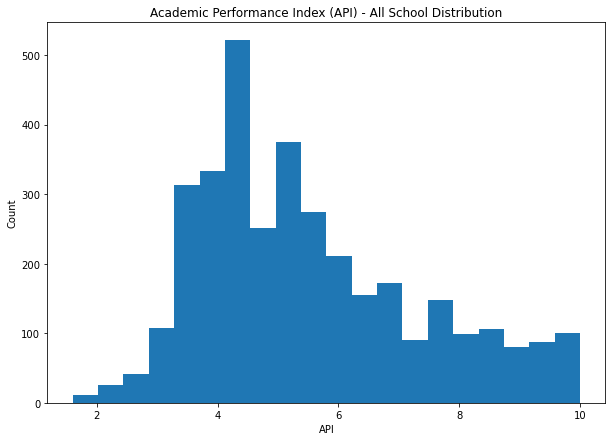

In [10]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
ax.hist(df.API, bins=20)
ax.set_title('Academic Performance Index (API) - All School Distribution')
ax.set_xlabel('API')
ax.set_ylabel('Count')
pass

## 2. Merge with house data and grouping to zip code


In [11]:
## Merge with house data
house = pd.read_csv('data/7_house_by_year.csv')
# house.head()

# Final merge
df2 = df.merge(house, on = 'zip')
df2

#df2.to_csv('data/13_merge_all.csv', index=False)

,schoolcode,schoolname,districtcode,districtname,zip,schooltype,student_tested1,student_tested2,testscore1,testscore2,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,middle,296.00,293.00,"2,443.20","2,406.50",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
1,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,high,62.00,62.00,"2,526.30","2,491.20",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
2,119651,Sun Valley High,64733,Los Angeles Unified,91352,high,81.00,81.00,"2,545.20","2,480.80",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
3,123984,ISANA Cardinal Academy,64733,ISANA Cardinal Academy,91352,elementary,169.00,170.00,"2,524.80","2,512.40",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
4,131466,Fenton STEM Academy: Elementary Center for Sci...,64733,Fenton STEM Academy: Elementary Center f,91352,elementary,157.00,157.00,"2,502.70","2,495.40",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,6029078,Richard Henry Lee Elementary,73924,Los Alamitos Unified,90720,elementary,334.00,334.00,"2,602.00","2,581.90",...,"697,295.25","796,288.67","824,812.17","865,147.92","903,773.50","940,771.92","1,003,873.92","1,033,240.50","1,073,417.83","1,155,946.00"
3469,6029086,Rossmoor Elementary,73924,Los Alamitos Unified,90720,elementary,283.00,282.00,"2,566.80","2,578.30",...,"697,295.25","796,288.67","824,812.17","865,147.92","903,773.50","940,771.92","1,003,873.92","1,033,240.50","1,073,417.83","1,155,946.00"
3470,6058853,Oak Middle,73924,Los Alamitos Unified,90720,middle,"1,174.00","1,173.00","2,654.70","2,621.00",...,"697,295.25","796,288.67","824,812.17","865,147.92","903,773.50","940,771.92","1,003,873.92","1,033,240.50","1,073,417.83","1,155,946.00"
3471,6058879,Sharon Christa McAuliffe Middle,73924,Los Alamitos Unified,90720,middle,"1,176.00","1,176.00","2,639.40","2,620.20",...,"697,295.25","796,288.67","824,812.17","865,147.92","903,773.50","940,771.92","1,003,873.92","1,033,240.50","1,073,417.83","1,155,946.00"


In [12]:
df2.schoolname.unique().size

2443

In [13]:
print(df2.columns)
df2[df2.schooltype == 'high']['API'].describe()

Index(['schoolcode', 'schoolname', 'districtcode', 'districtname', 'zip',
       'schooltype', 'student_tested1', 'student_tested2', 'testscore1',
       'testscore2', 'test_API1', 'test_API2', 'cohortstudents',
       'graduates_count', 'graduates_rate', 'college_going_rate', 'completers',
       'enrolled_in_college', 'grad_API', 'coll_API', 'testscore',
       'student_tested', 'test_API', 'API', 'city', 'county', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


count   509.00
mean      5.18
std       1.71
min       1.60
25%       4.00
50%       5.00
75%       6.35
max       9.85
Name: API, dtype: float64

In [14]:
# Group by zip code
by_zip = df2.groupby(['zip','schooltype'])

# Compute weighted mean of test score & test_API
wm1 = lambda x: np.average(x, weights=df2.loc[x.index, 'student_tested'])
# #  weighted mean of graduates_rate & grad_API
# wm2 = lambda x: np.average(x, weights=df2.loc[x.index, 'cohortstudents'])
# #  weighted mean of college_goind_rate & coll_API
# wm3 = lambda x: np.average(x, weights=df2.loc[x.index, 'completers'])

df3 = by_zip.agg({'testscore':wm1, 'test_API':wm1, 'cohortstudents':'sum',
                  'graduates_count':'sum','completers':'sum',\
                  'enrolled_in_college':'sum','2020':'mean'})

df3.head(10)

testscore  test_API  cohortstudents  graduates_count  \
zip   schooltype                                                         
90001 elementary   2,463.66      4.30            0.00             0.00   
      high         2,539.35      3.91          589.00           498.00   
      middle       2,486.58      3.46            0.00             0.00   
90002 elementary   2,454.70      4.01            0.00             0.00   
      high         2,510.68      3.67          253.00           180.00   
      middle       2,468.14      3.30            0.00             0.00   
90003 elementary   2,457.38      4.02            0.00             0.00   
      high         2,529.78      3.96          829.00           705.00   
      middle       2,506.95      3.93            0.00             0.00   
90004 elementary   2,498.98      5.45            0.00             0.00   

                  completers  enrolled_in_college         2020  
zip   schooltype                                                
90001 elementary        0.00                 0.00   437,487.17  
      high            432.00               177.00   437,487.17  
      middle            0.00                 0.00   437,487.17  
90002 elementary        0.00                 0.00   430,948.67  
      high            112.00                26.00   430,948.67  
      middle            0.00                 0.00   430,948.67  
90003 elementary        0.00                 0.00   454,610.08  
      high            484.00               206.00   454,610.08  
      middle            0.00                 0.00   454,610.08  
90004 elementary        0.00                 0.00 1,592,103.33

In [15]:
df3['graduates_rate'] = df3.graduates_count/df3.cohortstudents*100
df3['college_going_rate'] = df3.enrolled_in_college/df3.completers*100

# calculate API for the graduate rate
bins = [0, 40, 70, 83, 93, 94, 95, 96, 98, 99, 100]
labels = list(range(1,11))
df3['grad_API'] = pd.cut(df3.graduates_rate, bins=bins, labels=labels)

# calculate API for the college going rate
bins = [0, 20, 35, 50, 60, 70, 75, 80, 85, 90, 100]
df3['coll_API'] = pd.cut(df3.college_going_rate, bins=bins, labels=labels)

df3 = df3.astype({'grad_API':'float', 'coll_API':'float'})
df3.grad_API.fillna(0, inplace=True)
df3.coll_API.fillna(0, inplace=True)
#print(df.coll_API.value_counts())

## Combined API
# df['API'] = ''
df3['API'] = df3.test_API

# High school missing going to college data:
filter1 = (df3.grad_API != 0) & (df3.coll_API == 0)
# Adjust test scores weighs to 80%
df3.loc[filter1,['API']] = df3.test_API*0.8 + df3.grad_API*0.2 

# High school having graduation rate & college going data:
filter2 = (df3.grad_API != 0) & (df3.coll_API != 0)
# Adjust test scores weighs to 70%, grad_rate 15% & going to college 15%
df3.loc[filter2,['API']] = df3.test_API*0.7 + df3.grad_API*0.15 + df3.coll_API*0.15
df3 = df3.unstack()
df3 = df3.reset_index()

df3.head()


zip  testscore                     test_API              \
schooltype        elementary     high   middle elementary high middle   
0           90001   2,463.66 2,539.35 2,486.58       4.30 3.91   3.46   
1           90002   2,454.70 2,510.68 2,468.14       4.01 3.67   3.30   
2           90003   2,457.38 2,529.78 2,506.95       4.02 3.96   3.93   
3           90004   2,498.98 2,581.40 2,524.00       5.45 5.23   4.33   
4           90005   2,494.50 2,557.85 2,545.89       4.90 4.44   4.71   

           cohortstudents                ... college_going_rate   grad_API  \
schooltype     elementary   high middle  ...             middle elementary   
0                    0.00 589.00   0.00  ...                nan       0.00   
1                    0.00 253.00   0.00  ...                nan       0.00   
2                    0.00 829.00   0.00  ...                nan       0.00   
3                    0.00 221.00   0.00  ...                nan       0.00   
4                  130.00 411.00 204.00  ...              53.71       4.00   

                         coll_API                    API              
schooltype high middle elementary high middle elementary high middle  
0          4.00   0.00       0.00 3.00   0.00       4.30 3.79   3.46  
1          3.00   0.00       0.00 2.00   0.00       4.01 3.32   3.30  
2          4.00   0.00       0.00 3.00   0.00       4.02 3.82   3.93  
3          4.00   0.00       0.00 0.00   0.00       5.45 4.98   4.33  
4          3.00   3.00       4.00 4.00   4.00       4.63 4.16   4.34  

[5 rows x 37 columns]

In [16]:
df3 = df3[['zip','testscore','graduates_rate','college_going_rate','API','2020']]
df3.columns = ['zip','testscore_elem','testscore_high','testscore_mid', 'grad_elem','grad_rate',\
               'grad_mid','coll_elem','college_rate','coll_mid','API_elem','API_high',\
              'API_mid','2020','2020_high','2020_mid']
df3 = df3.drop(['grad_elem','grad_mid','coll_elem','coll_mid','2020_high','2020_mid'], axis=1)
df3.head()

,zip,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,2020
0,90001,"2,463.66","2,539.35","2,486.58",84.55,40.97,4.30,3.79,3.46,"437,487.17"
1,90002,"2,454.70","2,510.68","2,468.14",71.15,23.21,4.01,3.32,3.30,"430,948.67"
2,90003,"2,457.38","2,529.78","2,506.95",85.04,42.56,4.02,3.82,3.93,"454,610.08"
3,90004,"2,498.98","2,581.40","2,524.00",89.59,nan,5.45,4.98,4.33,"1,592,103.33"
4,90005,"2,494.50","2,557.85","2,545.89",79.08,51.70,4.63,4.16,4.34,"1,598,603.25"


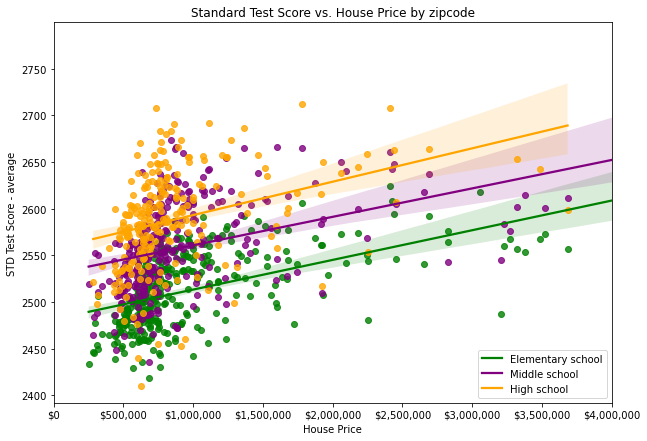

In [17]:
## Plot test score and house price


fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.regplot(x='2020',y='testscore_elem', data=df3, color='green')
sns.regplot(x='2020',y='testscore_mid', data=df3, color='purple')
sns.regplot(x='2020',y='testscore_high', data=df3, color='orange')
ax.legend(labels=['Elementary school','Middle school','High school'], loc='lower right')
ax.set_title('Standard Test Score vs. House Price by zipcode')
ax.set_xlabel('House Price')
ax.set_ylabel('STD Test Score - average')
ax.set_xlim((0,4000000))
fmtx = '${x:,.0f}'
tickx = mtick.StrMethodFormatter(fmtx)
ax.xaxis.set_major_formatter(tickx)


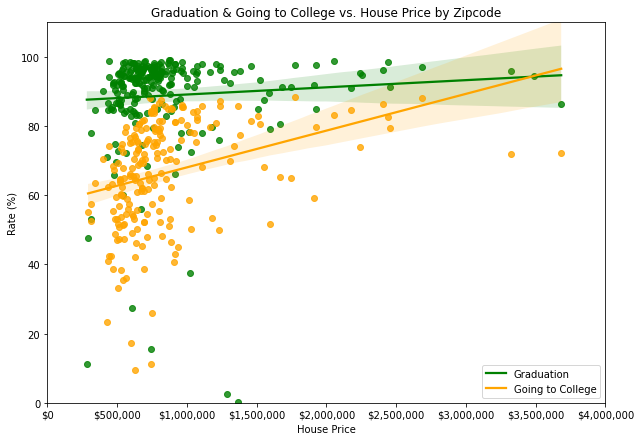

In [18]:
## Plot College Going Rate and Graduation Rate versus house price
fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.regplot(x='2020',y='grad_rate', data=df3, color='green')
sns.regplot(x='2020',y='college_rate', data=df3, color='orange')
ax.legend(labels=['Graduation','Going to College'], loc='lower right')
ax.set_title('Graduation & Going to College vs. House Price by Zipcode')
ax.set_xlabel('House Price')
ax.set_ylabel('Rate (%)')
ax.set_xlim((0,4000000))
ax.set_ylim((0,110))
fmtx = '${x:,.0f}'
tickx = mtick.StrMethodFormatter(fmtx)
ax.xaxis.set_major_formatter(tickx)

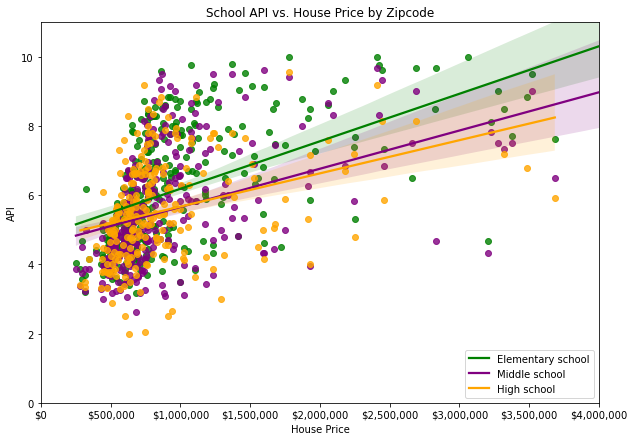

In [19]:
## Plot API and house price

fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.regplot(x='2020',y='API_elem', data=df3, color='green')
sns.regplot(x='2020',y='API_mid', data=df3, color='purple')
sns.regplot(x='2020',y='API_high', data=df3, color='orange')
ax.legend(labels=['Elementary school','Middle school','High school'], loc='lower right')
ax.set_title('School API vs. House Price by Zipcode')
ax.set_xlabel('House Price')
ax.set_ylabel('API')
ax.set_xlim((0,4000000))
ax.set_ylim((0,11))
fmtx = '${x:,.0f}'
tickx = mtick.StrMethodFormatter(fmtx)
ax.xaxis.set_major_formatter(tickx)

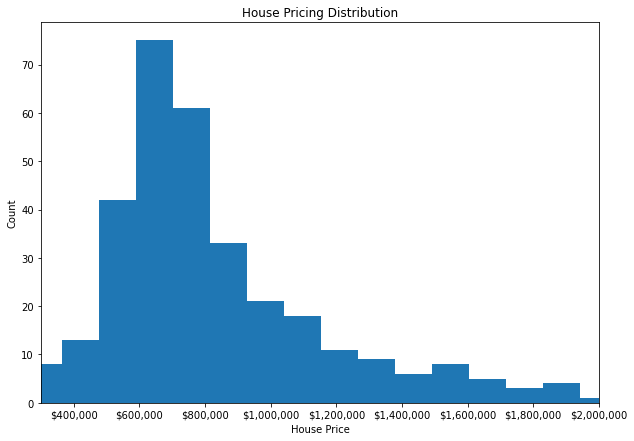

In [20]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
ax.hist(df3['2020'], bins=50)
ax.set_title('House Pricing Distribution')
ax.set_xlabel('House Price')
ax.set_ylabel('Count')
ax.set_xlim((300000,2000000))
fmtx = '${x:,.0f}'
tickx = mtick.StrMethodFormatter(fmtx)
ax.xaxis.set_major_formatter(tickx)
pass

In [21]:
## Calculate combined API for elementary, middle & high school
# Normal
df3['API_all'] = (df3.API_elem + df3.API_mid + df3.API_high)/3
df3.head()

# Zip code has no high school & middle school
filter1 = (df3.API_high.isnull()) & (df3.API_mid.isnull())
df3.loc[filter1,['API_all']] = df3.API_elem

# Zip code has no high school
filter2 = (df3.API_high.isnull()) & (~df3.API_mid.isnull())
df3.loc[filter2, ['API_all']] = (df3.API_elem + df3.API_mid)/2

# Zip code has no middle school
filter3 = (~df3.API_high.isnull()) & (df3.API_mid.isnull())
df3.loc[filter3, ['API_all']] = (df3.API_elem + df3.API_high)/2

# Zip code has no elem or middle school
filter4 = (df3.API_elem.isnull()) & (df3.API_mid.isnull())
df3.loc[filter4, ['API_all']] = df3.API_high

df3.head()

,zip,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,2020,API_all
0,90001,"2,463.66","2,539.35","2,486.58",84.55,40.97,4.30,3.79,3.46,"437,487.17",3.85
1,90002,"2,454.70","2,510.68","2,468.14",71.15,23.21,4.01,3.32,3.30,"430,948.67",3.54
2,90003,"2,457.38","2,529.78","2,506.95",85.04,42.56,4.02,3.82,3.93,"454,610.08",3.92
3,90004,"2,498.98","2,581.40","2,524.00",89.59,nan,5.45,4.98,4.33,"1,592,103.33",4.92
4,90005,"2,494.50","2,557.85","2,545.89",79.08,51.70,4.63,4.16,4.34,"1,598,603.25",4.38


In [22]:
# Cut house pricing by ranges
bins = [200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, np.inf]
labels = [200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
df3['price_range'] = pd.cut(df3['2020'], bins=bins, labels=labels)
df3.head()

,zip,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,2020,API_all,price_range
0,90001,"2,463.66","2,539.35","2,486.58",84.55,40.97,4.30,3.79,3.46,"437,487.17",3.85,400000
1,90002,"2,454.70","2,510.68","2,468.14",71.15,23.21,4.01,3.32,3.30,"430,948.67",3.54,400000
2,90003,"2,457.38","2,529.78","2,506.95",85.04,42.56,4.02,3.82,3.93,"454,610.08",3.92,400000
3,90004,"2,498.98","2,581.40","2,524.00",89.59,nan,5.45,4.98,4.33,"1,592,103.33",4.92,1000000
4,90005,"2,494.50","2,557.85","2,545.89",79.08,51.70,4.63,4.16,4.34,"1,598,603.25",4.38,1000000


In [23]:
by_price = df3.groupby('price_range').agg(['mean','max'])[['grad_rate','college_rate','API_all']]
by_price.columns = ['grad_mean','grad_max','coll_mean','coll_max','API_mean','API_max']
by_price = by_price.reset_index()
by_price

,price_range,grad_mean,grad_max,coll_mean,coll_max,API_mean,API_max
0,200000,29.43,47.74,55.08,55.08,3.94,4.58
1,300000,76.49,90.24,60.98,70.36,4.20,5.58
2,400000,85.38,98.82,52.57,74.21,4.25,4.89
3,500000,90.22,98.49,59.46,79.63,4.73,6.00
4,600000,90.37,98.50,62.86,81.79,5.21,7.47
5,700000,90.92,98.87,71.24,88.13,5.90,8.36
6,800000,93.65,99.18,69.85,87.62,6.50,9.17
7,900000,89.68,98.39,70.48,86.04,6.60,9.00
8,1000000,86.60,98.79,75.55,88.54,7.05,10.00


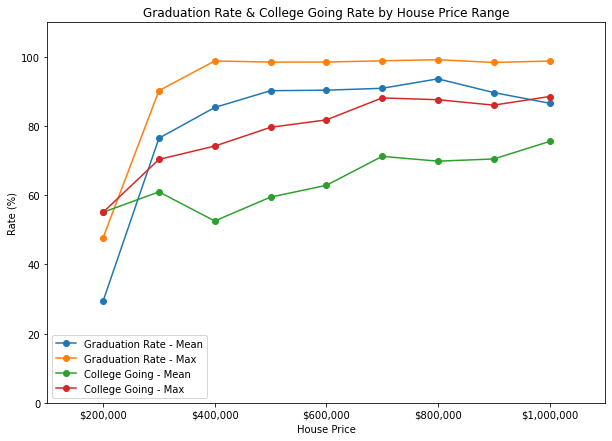

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
plt.plot(by_price.price_range, by_price.grad_mean, marker='o')
plt.plot(by_price.price_range, by_price.grad_max, marker='o')
plt.plot(by_price.price_range, by_price.coll_mean, marker='o')
plt.plot(by_price.price_range, by_price.coll_max, marker='o')

ax.legend(labels=['Graduation Rate - Mean','Graduation Rate - Max',\
                  'College Going - Mean','College Going - Max'])
ax.set_title('Graduation Rate & College Going Rate by House Price Range')
ax.set_xlabel('House Price')
ax.set_ylabel('Rate (%)')
ax.set_xlim((100000,1100000))
ax.set_ylim((0,110))
fmtx = '${x:,.0f}'
tickx = mtick.StrMethodFormatter(fmtx)
ax.xaxis.set_major_formatter(tickx)

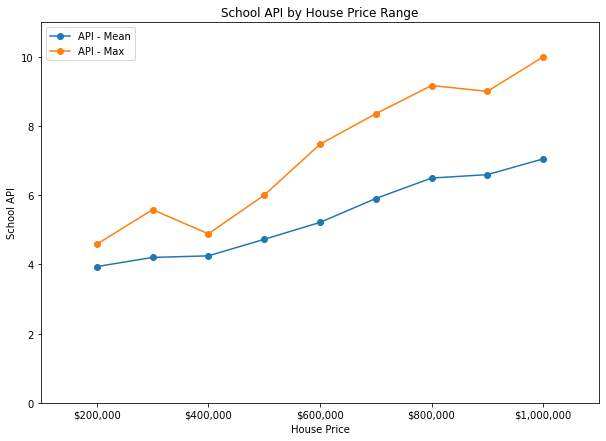

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
plt.plot(by_price.price_range, by_price.API_mean, marker='o')
plt.plot(by_price.price_range, by_price.API_max, marker='o')

ax.legend(labels=['API - Mean','API - Max'])
ax.set_title('School API by House Price Range')
ax.set_xlabel('House Price')
ax.set_ylabel('School API')
ax.set_xlim((100000,1100000))
ax.set_ylim((0,11))
fmtx = '${x:,.0f}'
tickx = mtick.StrMethodFormatter(fmtx)
ax.xaxis.set_major_formatter(tickx)

In [26]:
df3.shape

(344, 12)

## 3.House value changing through years & top 10 Zip codes in each house value range

In [27]:
by_price2 = df3.groupby('price_range')

# 800K group
k800 = by_price2.get_group(800000).dropna()
k800 = k800.sort_values('API_all')

# 700K group
k700 = by_price2.get_group(700000).dropna()
k700 = k700.sort_values('API_all')

# 600K group
k600 = by_price2.get_group(600000).dropna()
k600 = k600.sort_values('API_all')

# 500K group
k500 = by_price2.get_group(500000).dropna()
k500 = k500.sort_values('API_all')

# 400K group
k400 = by_price2.get_group(400000).dropna()
k400 = k400.sort_values('API_all')


k800.head()

,zip,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,2020,API_all,price_range
165,91103,"2,475.65","2,523.20","2,471.95",92.12,62.29,4.21,4.15,3.17,"883,618.75",3.84,800000
327,92867,"2,498.68","2,518.60","2,549.59",94.23,55.56,5.11,4.30,4.50,"800,177.83",4.64,800000
37,90042,"2,475.43","2,580.99","2,555.56",82.95,64.83,4.72,4.74,4.73,"852,443.50",4.73,800000
6,90007,"2,455.87","2,587.08","2,528.02",90.46,48.28,4.92,4.77,4.72,"821,309.33",4.80,800000
215,91411,"2,522.08","2,584.00","2,471.76",84.26,46.42,7.06,4.55,3.10,"887,083.67",4.90,800000


In [28]:
# merge house price
# 800K group
k800 = k800.drop('2020', axis=1)
k800 = k800.merge(house, on = 'zip')
k800['delta_10years']= k800['2020'] - k800['2010']

# 700K group
k700 = k700.drop('2020', axis=1)
k700 = k700.merge(house, on = 'zip')
k700['delta_10years']= k700['2020'] - k700['2010']

# 600K group
k600 = k600.drop('2020', axis=1)
k600 = k600.merge(house, on = 'zip')
k600['delta_10years']= k600['2020'] - k600['2010']

# 500K group
k500 = k500.drop('2020', axis=1)
k500 = k500.merge(house, on = 'zip')
k500['delta_10years']= k500['2020'] - k500['2010']

# 400K group
k400 = k400.drop('2020', axis=1)
k400 = k400.merge(house, on = 'zip')
k400['delta_10years']= k400['2020'] - k400['2010']

k800.head()

,zip,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,API_all,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,delta_10years
0,91103,"2,475.65","2,523.20","2,471.95",92.12,62.29,4.21,4.15,3.17,3.84,...,"560,886.75","609,804.58","648,261.17","709,064.75","760,478.58","814,740.50","827,356.92","883,618.75","947,240.50","380,211.42"
1,92867,"2,498.68","2,518.60","2,549.59",94.23,55.56,5.11,4.30,4.50,4.64,...,"600,825.92","639,348.50","664,570.75","701,426.00","733,381.75","763,367.75","768,062.42","800,177.83","854,008.50","242,155.17"
2,90042,"2,475.43","2,580.99","2,555.56",82.95,64.83,4.72,4.74,4.73,4.73,...,"498,758.42","553,389.50","610,624.58","675,991.67","736,075.50","811,654.67","816,494.00","852,443.50","898,499.00","434,282.67"
3,90007,"2,455.87","2,587.08","2,528.02",90.46,48.28,4.92,4.77,4.72,4.80,...,"398,752.42","443,502.17","499,954.33","553,290.92","635,503.58","723,524.50","743,885.08","821,309.33","864,623.00","488,572.75"
4,91411,"2,522.08","2,584.00","2,471.76",84.26,46.42,7.06,4.55,3.10,4.90,...,"542,906.25","601,013.42","634,387.17","686,740.33","736,160.42","779,838.33","800,677.67","887,083.67","954,655.00","395,909.17"


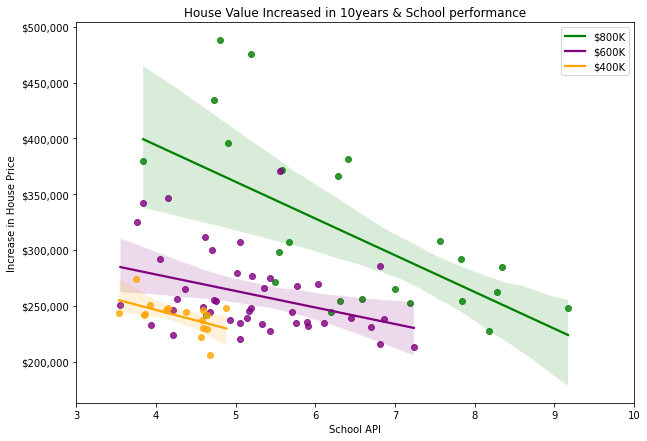

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.regplot(x='API_all',y='delta_10years', data=k800, color='green')
sns.regplot(x='API_all',y='delta_10years', data=k600, color='purple')
sns.regplot(x='API_all',y='delta_10years', data=k400, color='orange')
ax.legend(labels=['$800K','$600K','$400K'])
ax.set_title('House Value Increased in 10years & School performance')
ax.set_xlabel('School API')
ax.set_ylabel('Increase in House Price')
ax.set_xlim((3,10))
fmty = '${x:,.0f}'
ticky = mtick.StrMethodFormatter(fmty)
ax.yaxis.set_major_formatter(ticky)

In [30]:
# Top 10 zip code with best school performance in each price range
# table with Price range, zip code, API, graduate rate, college rate
top10_800 = k800.iloc[-10:,:]
top10_800 = top10_800.set_index('zip')
top10_800

,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,API_all,price_range,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,delta_10years
zip,,,,,,,,,,,,,,,,,,,,,
92653,"2,531.49","2,613.30","2,567.15",99.18,73.45,6.50,6.60,6.67,6.59,800000,...,"683,208.67","742,140.00","766,341.00","786,164.00","813,553.50","846,203.25","844,372.67","876,015.17","937,664.50","256,251.58"
90623,"2,574.20","2,633.75","2,560.17",95.92,66.57,8.56,6.70,5.72,6.99,800000,...,"590,696.50","629,376.92","655,279.58","686,812.58","729,919.08","763,887.17","769,582.00","814,547.58","869,594.50","264,834.08"
92692,"2,557.08","2,623.05","2,624.87",95.64,81.49,8.30,6.80,6.47,7.19,800000,...,"644,910.08","686,518.92","704,036.08","736,198.58","768,147.92","799,536.75","792,621.92","823,766.08","878,049.00","252,714.25"
91780,"2,537.29","2,644.82","2,608.10",97.01,87.62,7.47,7.72,7.52,7.57,800000,...,"569,121.17","621,867.25","646,383.67","677,740.50","711,209.75","751,449.42","761,379.33","818,202.42","862,596.50","308,255.58"
92708,"2,569.41","2,637.19","2,630.24",93.91,85.25,8.60,6.85,8.04,7.83,800000,...,"646,244.00","681,704.50","708,914.50","744,032.17","778,531.33","827,560.50","838,078.58","885,953.17","941,490.00","292,144.75"
92807,"2,557.72","2,633.82","2,602.22",93.90,79.53,8.30,6.45,8.76,7.84,800000,...,"606,127.42","649,248.83","676,118.00","706,560.75","735,923.83","770,993.42","774,455.33","810,384.25","860,958.50","254,303.08"
91789,"2,555.34","2,680.10","2,625.93",95.89,86.65,8.30,8.35,7.90,8.18,800000,...,"643,040.08","711,015.25","733,969.25","748,288.17","772,210.08","793,062.67","774,204.42","804,047.92","850,370.50","227,019.92"
92612,"2,535.90","2,683.75","2,673.90",95.17,85.71,6.83,8.70,9.32,8.28,800000,...,"659,182.83","706,480.67","726,122.08","754,987.75","787,880.67","825,944.33","830,263.83","843,329.58","870,076.00","261,971.25"
92604,"2,567.34","2,666.55","2,628.91",95.26,84.87,8.57,7.88,8.58,8.35,800000,...,"685,609.42","737,828.08","759,071.25","786,372.00","825,860.92","868,687.17","867,560.42","892,102.92","933,082.50","284,378.25"


In [31]:
# 700K top 10
top10_700 = k700.iloc[-10:,:]
top10_700 = top10_700.set_index('zip')
top10_700

# 600K top 10
top10_600 = k600.iloc[-10:,:]
top10_600 = top10_600.set_index('zip')
top10_600

# 500K top 10
top10_500 = k500.iloc[-10:,:]
top10_500 = top10_500.set_index('zip')
top10_500


,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,API_all,price_range,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,delta_10years
zip,,,,,,,,,,,,,,,,,,,,,
90022,"2,478.37","2,594.65","2,541.77",95.25,47.36,5.05,5.29,4.97,5.11,500000,...,"306,725.00","341,917.50","366,983.67","398,178.42","427,948.75","460,552.33","471,530.33","510,841.92","533,718.00","239,078.75"
91722,"2,502.46","2,580.93","2,553.15",98.25,67.92,5.43,5.60,4.64,5.22,500000,...,"349,545.33","390,973.42","412,183.50","440,770.83","468,555.17","504,727.67","505,227.83","539,973.67","576,583.50","221,188.92"
90706,"2,481.70","2,601.10","2,516.90",97.46,55.91,4.78,6.00,4.94,5.24,500000,...,"366,155.17","401,128.42","427,037.92","460,005.92","496,158.67","533,214.58","537,834.08","576,386.92","614,205.50","236,962.83"
90606,"2,504.20","2,593.05","2,556.64",96.70,59.87,5.77,5.65,4.90,5.44,500000,...,"346,226.75","383,543.67","408,110.42","440,367.00","467,734.83","498,273.83","503,519.17","541,864.75","581,164.50","227,113.42"
90670,"2,502.85","2,599.15","2,565.12",94.34,64.84,5.65,5.50,5.32,5.49,500000,...,"352,165.50","386,693.42","412,727.75","444,195.83","473,299.58","506,827.67","514,514.33","552,535.58","589,488.50","235,214.17"
91731,"2,493.35","2,604.10","2,561.31",90.36,72.64,5.41,5.70,5.46,5.52,500000,...,"369,789.50","410,140.50","432,440.83","455,180.67","490,040.25","532,983.75","520,123.92","544,932.75","583,506.50","202,928.83"
91723,"2,503.56","2,602.91","2,551.60",98.49,76.64,5.80,6.25,4.67,5.57,500000,...,"389,078.92","431,005.58","456,560.58","486,398.50","521,239.08","556,281.17","556,456.67","595,000.58","636,253.50","230,033.33"
90605,"2,498.97","2,614.45","2,550.07",95.74,79.63,5.73,6.65,4.81,5.73,500000,...,"374,315.58","410,024.67","432,449.92","462,344.00","492,220.25","527,562.75","529,590.08","565,446.58","607,973.50","225,048.50"
91790,"2,515.14","2,595.55","2,560.74",95.72,75.00,6.20,5.80,5.53,5.84,500000,...,"381,660.92","424,309.50","450,661.58","482,167.00","513,754.00","552,065.17","554,764.33","589,272.75","625,482.00","236,948.92"


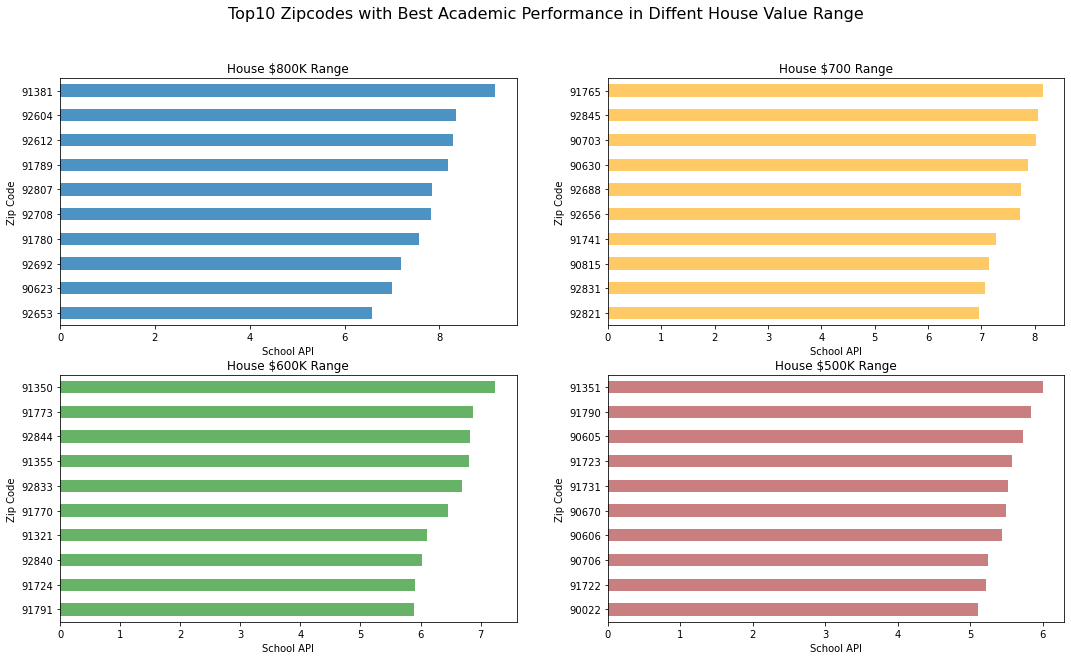

In [32]:
fig = plt.figure(figsize = (18,10))
fig.suptitle('Top10 Zipcodes with Best Academic Performance in Diffent House Value Range',fontsize = 16)
ax1 = fig.add_subplot(2,2,1)
ax1 = top10_800.API_all.plot(kind = 'barh', alpha=0.8)
ax1.set_title('House $800K Range')
ax1.set_xlabel('School API')
ax1.set_ylabel('Zip Code')

ax2 = fig.add_subplot(2,2,2)
ax2 = top10_700.API_all.plot(kind = 'barh', color='orange', alpha=0.6)
ax2.set_title('House $700 Range')
ax2.set_xlabel('School API')
ax2.set_ylabel('Zip Code')

ax3 = fig.add_subplot(2,2,3)
ax3 = top10_600.API_all.plot(kind = 'barh', color='green', alpha=0.6)
ax3.set_title('House $600K Range')
ax3.set_xlabel('School API')
ax3.set_ylabel('Zip Code')

ax4 = fig.add_subplot(2,2,4)
ax4 = top10_500.API_all.plot(kind = 'barh', color='brown', alpha=0.6)
ax4.set_title('House $500K Range')
ax4.set_xlabel('School API')
ax4.set_ylabel('Zip Code')
pass

## 4. Group by School District Code

In [33]:
df2.head()

,schoolcode,schoolname,districtcode,districtname,zip,schooltype,student_tested1,student_tested2,testscore1,testscore2,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,middle,296.00,293.00,"2,443.20","2,406.50",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
1,100776,North Valley Military Institute College Prepar...,10199,North Valley Military Institute College,91352,high,62.00,62.00,"2,526.30","2,491.20",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
2,119651,Sun Valley High,64733,Los Angeles Unified,91352,high,81.00,81.00,"2,545.20","2,480.80",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
3,123984,ISANA Cardinal Academy,64733,ISANA Cardinal Academy,91352,elementary,169.00,170.00,"2,524.80","2,512.40",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"
4,131466,Fenton STEM Academy: Elementary Center for Sci...,64733,Fenton STEM Academy: Elementary Center f,91352,elementary,157.00,157.00,"2,502.70","2,495.40",...,"309,404.83","369,392.75","413,212.25","444,669.58","479,394.83","521,729.75","569,713.25","583,283.08","640,680.17","694,285.00"


In [34]:
# Group by zip code
by_district = df2.groupby(['districtcode','schooltype'])

# Compute weighted mean of test score & test_API
wm1 = lambda x: np.average(x, weights=df2.loc[x.index, 'student_tested'])

df4 = by_district.agg({'testscore':wm1, 'test_API':wm1, 'cohortstudents':'sum',
                  'graduates_count':'sum','completers':'sum',\
                  'enrolled_in_college':'sum','2020':'mean'})

df4.head(10)

testscore  test_API  cohortstudents  graduates_count  \
districtcode schooltype                                                         
10199        elementary   2,521.72      6.52            0.00             0.00   
             high         2,574.34      5.39          945.00           695.00   
             middle       2,526.05      4.37          409.00           327.00   
10306        elementary   2,527.62      6.30          148.00           109.00   
             high         2,560.91      4.84          496.00           342.00   
             middle       2,557.69      5.20          160.00           110.00   
64212        elementary   2,527.04      6.89            0.00             0.00   
             high         2,643.18      6.97        1,448.00         1,414.00   
             middle       2,593.52      6.82          161.00           160.00   
64246        high         2,521.35      3.85        5,146.00         4,077.00   

                         completers  enrolled_in_college       2020  
districtcode schooltype                                              
10199        elementary        0.00                 0.00 659,145.38  
             high            363.00               246.00 914,762.67  
             middle           50.00                 9.00 647,928.31  
10306        elementary        0.00                 0.00 807,943.93  
             high              0.00                 0.00 796,507.04  
             middle            0.00                 0.00 809,921.70  
64212        elementary        0.00                 0.00 692,661.43  
             high          1,510.00             1,067.00 739,886.00  
             middle          163.00               144.00 696,931.53  
64246        high          4,323.00             2,670.00 347,394.24

In [35]:
df4['graduates_rate'] = df4.graduates_count/df4.cohortstudents*100
df4['college_going_rate'] = df4.enrolled_in_college/df4.completers*100

# calculate API for the graduate rate
bins = [0, 40, 70, 83, 93, 94, 95, 96, 98, 99, 100]
labels = list(range(1,11))
df4['grad_API'] = pd.cut(df4.graduates_rate, bins=bins, labels=labels)

# calculate API for the college going rate
bins = [0, 20, 35, 50, 60, 70, 75, 80, 85, 90, 100]
df4['coll_API'] = pd.cut(df4.college_going_rate, bins=bins, labels=labels)

df4 = df4.astype({'grad_API':'float', 'coll_API':'float'})
df4.grad_API.fillna(0, inplace=True)
df4.coll_API.fillna(0, inplace=True)
#print(df.coll_API.value_counts())

## Combined API
df4['API'] = df4.test_API

# High school missing going to college data:
filter1 = (df4.grad_API != 0) & (df4.coll_API == 0)
# Adjust test scores weighs to 80%
df4.loc[filter1,['API']] = df4.test_API*0.8 + df4.grad_API*0.2 

# High school having graduation rate & college going data:
filter2 = (df4.grad_API != 0) & (df4.coll_API != 0)
# Adjust test scores weighs to 70%, grad_rate 15% & going to college 15%
df4.loc[filter2,['API']] = df4.test_API*0.7 + df4.grad_API*0.15 + df4.coll_API*0.15
df4 = df4.unstack()
df4 = df4.reset_index()
df4.head()


districtcode  testscore                     test_API              \
schooltype              elementary     high   middle elementary high middle   
0                 10199   2,521.72 2,574.34 2,526.05       6.52 5.39   4.37   
1                 10306   2,527.62 2,560.91 2,557.69       6.30 4.84   5.20   
2                 64212   2,527.04 2,643.18 2,593.52       6.89 6.97   6.82   
3                 64246        nan 2,521.35 2,532.50        nan 3.85   4.25   
4                 64261   2,583.01 2,655.95 2,656.19       9.26 7.50   8.94   

           cohortstudents                  ... college_going_rate   grad_API  \
schooltype     elementary     high middle  ...             middle elementary   
0                    0.00   945.00 409.00  ...              18.00       0.00   
1                  148.00   496.00 160.00  ...                nan       3.00   
2                    0.00 1,448.00 161.00  ...              88.34       0.00   
3                     nan 5,146.00  34.00  ...                nan        nan   
4                    0.00   785.00   0.00  ...                nan       0.00   

                         coll_API                    API              
schooltype high middle elementary high middle elementary high middle  
0          3.00   3.00       0.00 5.00   1.00       6.52 4.98   3.66  
1          2.00   2.00       0.00 0.00   0.00       5.64 4.27   4.56  
2          8.00  10.00       0.00 6.00   9.00       6.89 6.98   7.63  
3          3.00   4.00        nan 5.00   0.00        nan 3.89   4.20  
4          8.00   0.00       0.00 9.00   0.00       9.26 7.80   8.94  

[5 rows x 37 columns]

In [36]:
df4 = df4[['districtcode','testscore','graduates_rate','college_going_rate','API','2020']]
df4.columns = ['district','testscore_elem','testscore_high','testscore_mid', 'grad_elem','grad_rate',\
               'grad_mid','coll_elem','college_rate','coll_mid','API_elem','API_high',\
              'API_mid','2020','2020_high','2020_mid']
df4 = df4.drop(['grad_elem','grad_mid','coll_elem','coll_mid','2020_high','2020_mid'], axis=1).dropna()
df4.head()

,district,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,2020
0,10199,"2,521.72","2,574.34","2,526.05",73.54,67.77,6.52,4.98,3.66,"659,145.38"
2,64212,"2,527.04","2,643.18","2,593.52",97.65,70.66,6.89,6.98,7.63,"692,661.43"
4,64261,"2,583.01","2,655.95","2,656.19",97.32,85.71,9.26,7.80,8.94,"1,218,274.43"
5,64279,"2,481.99","2,553.92","2,519.62",90.69,53.01,4.68,4.28,4.07,"526,157.98"
6,64287,"2,479.88","2,547.31","2,529.32",49.49,69.46,4.63,4.12,3.87,"509,353.00"


In [37]:
## Sort by housing value for stacking
df4 = df4.sort_values('2020')

## Calculate combined API for elementary, middle & high school
# Normal
df4['API_all'] = (df4.API_elem + df4.API_mid + df4.API_high)/3

# Zip code has no high school & middle school
filter1 = (df4.API_high.isnull()) & (df4.API_mid.isnull())
df4.loc[filter1,['API_all']] = df4.API_elem

# Zip code has no high school
filter2 = (df4.API_high.isnull()) & (~df4.API_mid.isnull())
df4.loc[filter2, ['API_all']] = (df4.API_elem + df4.API_mid)/2

# Zip code has no middle school
filter3 = (~df4.API_high.isnull()) & (df4.API_mid.isnull())
df4.loc[filter3, ['API_all']] = (df4.API_elem + df4.API_high)/2

# Zip code has no elem or middle school
filter4 = (df4.API_elem.isnull()) & (df4.API_mid.isnull())
df4.loc[filter4, ['API_all']] = df4.API_high

df4 = df4.set_index('district')

df4.head()

,testscore_elem,testscore_high,testscore_mid,grad_rate,college_rate,API_elem,API_high,API_mid,2020,API_all
district,,,,,,,,,,
73437,"2,477.49","2,521.83","2,521.97",90.23,55.45,4.80,3.97,4.25,"481,057.61",4.34
64774,"2,479.43","2,517.58","2,499.16",90.55,53.04,4.64,3.78,3.97,"487,689.58",4.13
64287,"2,479.88","2,547.31","2,529.32",49.49,69.46,4.63,4.12,3.87,"509,353.00",4.20
64873,"2,478.53","2,528.78","2,533.83",91.60,53.38,4.78,3.90,4.33,"510,552.89",4.34
64907,"2,470.92","2,548.21","2,518.92",82.87,63.67,4.60,4.42,3.89,"523,978.84",4.30


In [38]:
df4['2020'].describe()

count          60.00
mean    1,014,631.53
std       691,424.56
min       481,057.61
25%       621,610.64
50%       776,840.58
75%     1,091,295.33
max     4,441,062.81
Name: 2020, dtype: float64

In [39]:
df4 = df4.drop(65029, axis=0)

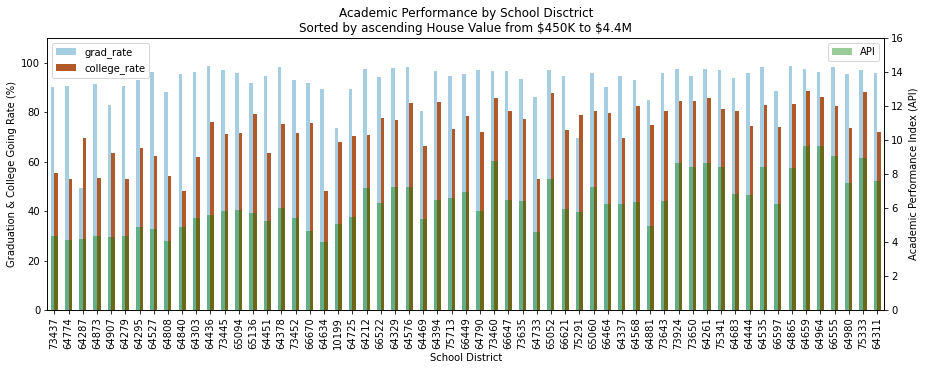

In [40]:
ax = df4[['grad_rate','college_rate']].plot.bar(stacked=False, colormap='Paired',\
    title = 'Academic Performance by School Disctrict\nSorted by ascending House Value from \$450K to \$4.4M',\
    xlabel = 'School District', ylabel = 'Graduation & College Going Rate (%)', figsize = (15,5))
ax.set_ylim((0, 110))

ax2 = ax.twinx()
ax2 = df4['API_all'].plot.bar(ylabel = 'Academic Performance Index (API)', color='green', alpha=0.4, label='API')
ax2.set_ylim((0, 16))
ax2.legend(loc=0)

pass

In [41]:
df4.shape

(59, 10)